In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df16 = pd.read_csv(os.path.join('2016_Data'))
del df16['Unnamed: 0']
del df16['Year']
del df16['Month']
del df16['Day']
del df16['Day_of_Week']
del df16['Weekend']
del df16['Datetime']

df16.head()

MW Utility  Temp(f)
0  10419.0   COMED     32.0
1   9940.0   COMED     32.0
2   9604.0   COMED     35.6
3   9318.0   COMED     37.4
4   9224.0   COMED     37.4

In [3]:
df_2016 = df16

In [4]:
df_2016c = df_2016[df_2016.Utility == 'COMED'].copy()

In [5]:
df_2016neg = df_2016c[df_2016c['Temp(f)'] < 60].copy()

In [6]:
droplist = df_2016neg[(df_2016neg['Temp(f)'] < 25) & (df_2016neg.MW > 14000)].index
df_2016neg.drop(droplist,inplace = True)

In [7]:
droplist2 = df_2016neg[(df_2016neg['Temp(f)'] < 60) & (df_2016neg['Temp(f)'] > 55)& (df_2016neg.MW > 12000)].index
df_2016neg.drop(droplist2,inplace = True)


In [8]:
droplist3 = df_2016neg[(df_2016neg['Temp(f)'] < 28) & (df_2016neg['Temp(f)'] > 34)& (df_2016neg.MW > 13700)].index
df_2016neg.drop(droplist3,inplace = True)

In [9]:
X = df_2016neg["Temp(f)"].values.reshape(-1, 1)
y = df_2016neg["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (3795, 1) (3795, 1)


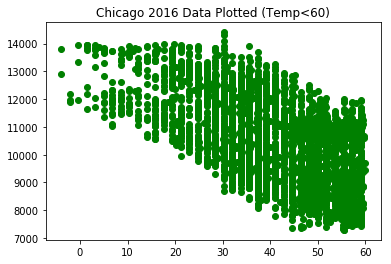

In [10]:
plt.scatter(X, y,color='g')
plt.title("Chicago 2016 Data Plotted (Temp<60)")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [17]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.30927274974285524
Testing Score: 0.35624040078116637


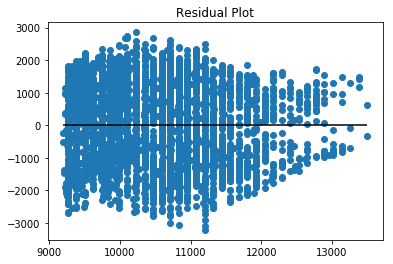

In [18]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

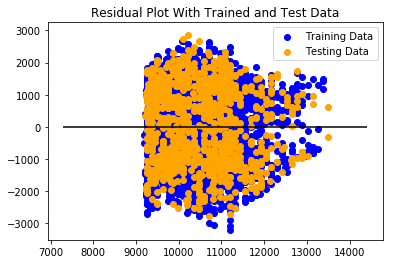

In [19]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [20]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-67.31969001]]
y-axis intercept:  [13230.58683767]


In [21]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  13510.69705811+ (-73.27804676 * x_min)
y_max = 13510.69705811+ (-73.27804676 * x_max)

Actual Min Value: 7290.0
Predicted Min Value: [[13499.86559772]]
Actual Max Value: 14411.0
Predicted Max Value: [[9193.42502765]]


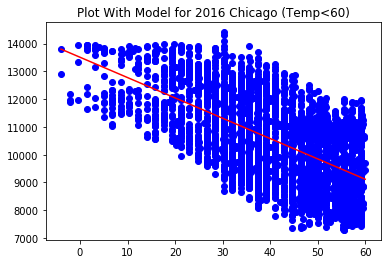

In [22]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2016 Chicago (Temp<60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [23]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [10419.]
Predicted output: [11076.35675728]
Prediction Error: [657.35675728]


In [24]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [25]:
modeldf

Actual        Error     Predicted
0     10419.0   657.356757  11076.356757
1      9940.0  1136.356757  11076.356757
2      9604.0  1230.005873  10834.005873
3      9318.0  1394.830431  10712.830431
4      9224.0  1488.830431  10712.830431
5      9209.0  1503.830431  10712.830431
6      9343.0  1369.830431  10712.830431
7      9715.0   876.654989  10591.654989
8      9809.0   661.479547  10470.479547
9      9974.0   496.479547  10470.479547
10    10087.0   504.654989  10591.654989
11    10187.0   404.654989  10591.654989
12    10299.0   292.654989  10591.654989
13    10385.0   206.654989  10591.654989
14    10261.0   209.479547  10470.479547
15    10313.0   157.479547  10470.479547
16    10416.0   -66.695895  10349.304105
17    11037.0  -808.871337  10228.128663
18    11587.0 -1237.695895  10349.304105
19    11549.0 -1199.695895  10349.304105
20    11273.0  -681.345011  10591.654989
21    11085.0  -372.169569  10712.830431
22    10801.0   -88.169569  10712.830431
23    10596.0   238.005873  10834.005873
24    10137.0   697.005873  10834.005873
25     9838.0  1117.181315  10955.181315
26     9715.0  1240.181315  10955.181315
27     9657.0  1298.181315  10955.181315
28     9885.0  1070.181315  10955.181315
29    10392.0   563.181315  10955.181315
...       ...          ...           ...
3765  10228.0  1090.707641  11318.707641
3766  10361.0   957.707641  11318.707641
3767  10506.0   933.883083  11439.883083
3768  10518.0  1043.058525  11561.058525
3769  10530.0  1152.233967  11682.233967
3770  10401.0  1160.058525  11561.058525
3771  10247.0  1165.955207  11412.955207
3772  10110.0  1100.996137  11210.996137
3773  10916.0   228.349644  11144.349644
3774  11846.0  -904.282623  10941.717377
3775  11718.0  -776.282623  10941.717377
3776  11580.0  -624.818685  10955.181315
3777  10407.0   911.707641  11318.707641
3778   9791.0  1648.883083  11439.883083
3779   9617.0  1822.883083  11439.883083
3780   9598.0  1841.883083  11439.883083
3781   9766.0  1795.058525  11561.058525
3782   9903.0  1658.058525  11561.058525
3783   9948.0  1855.409409  11803.409409
3784  10203.0  1479.233967  11682.233967
3785  10437.0  1245.233967  11682.233967
3786  10557.0  1004.058525  11561.058525
3787  10519.0  1042.058525  11561.058525
3788  10446.0  1101.594587  11547.594587
3789  10375.0  1064.883083  11439.883083
3790  10430.0   982.955207  11412.955207
3791  11849.0  -570.010976  11278.989024
3792  11827.0  -548.010976  11278.989024
3793  11678.0  -480.467801  11197.532199
3794  10838.0   359.532199  11197.532199

[3795 rows x 3 columns]